# Project Business Statistics: E-news Express

**Marks: 60**

## Problem Statement

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language?

Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website

group - Whether the user belongs to the first group (control) or the second group (treatment)

landing_page - Whether the landing page is new or old

time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

converted - Whether the user gets converted to a subscriber of the news portal or not

language_preferred - Language chosen by the user to view the landing page

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
# import libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [2]:
data = pd.read_csv(r'C:\Users\USER\Desktop\Great Learning\Module 2 Buisness Statistics\project\abtest.csv')
df=data.copy() #To avoid any changes to original data
df1=data.copy()
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
df.shape # To find the shape of the table

(100, 6)

## Observation

The dataset has got 100 rows and 6  columns. Data in each row corresponds to the time spent by user on e-paper

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
df.info() # To find data types of all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


### Observations

There are int object and float data types

In [5]:
df.isnull().sum() # To find is there columns with any missing values

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values

In [6]:
df.describe().T # To find the statistical summary of numeric columns

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


### Observation
Mean time spend on the page is 5.377
50 Percent of the people spent 5.41 minutes on the landing page

In [7]:
df['language_preferred'].value_counts() # To find the number of language_preferred

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

### Observation
Spanish and French are the preffered languages followed by English

In [8]:
df['converted'].value_counts() 

yes    54
no     46
Name: converted, dtype: int64

### Observations
54 user gets converted as a subscriber on the new landing page

### Univariate Analysis

#### Time spent on the page

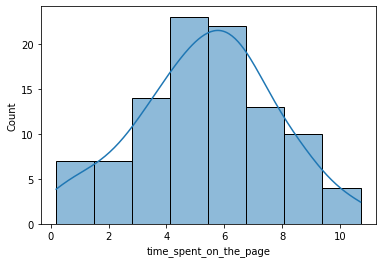

In [9]:
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.show()

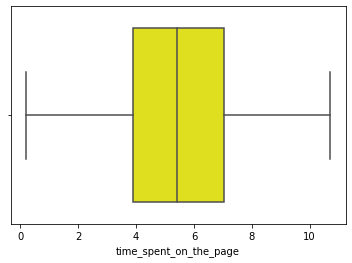

In [10]:
sns.boxplot(data=df,x='time_spent_on_the_page',color= 'yellow')
plt.show()

In [11]:
round(df1['time_spent_on_the_page'].mean(),2)

5.38

### Observation
Time spent on the  landing page follow a normal distribution and does not have any outliers. Mean time spent is 5.38 minutes

### Group

In [12]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

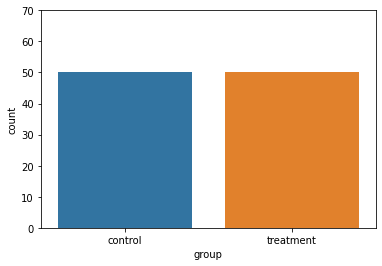

In [13]:
sns.countplot(data=df,x='group')
plt.ylim(0,70)
plt.show()

### Observation
There are 50 each in the control and treatment group

### Language Preffered

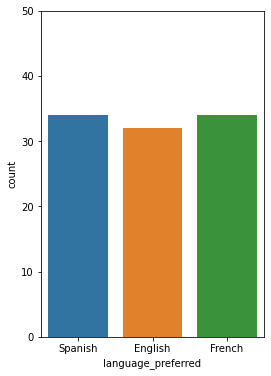

In [14]:
plt.figure(figsize = (4,6))
plt.ylim(0,50)
sns.countplot(data = df, x = 'language_preferred'); # Countplot for language_preferred

### Observation
The count for Spanish, English and French are almost the same

### Landing Page

In [15]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

### Observation
Number of perople on the old and new landing page are 50 each

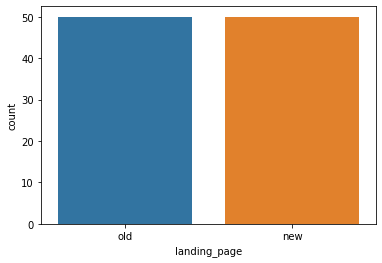

In [16]:
# complete the code to plot the countplot
sns.countplot(data=df,x='landing_page')
plt.show()

### Bivariate Analysis

### Landing page vs Time spent on the page

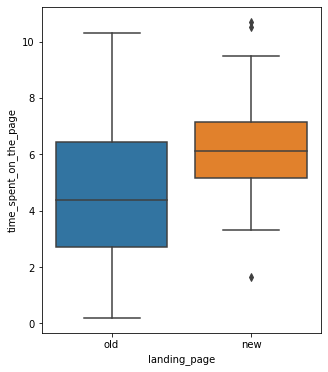

In [17]:
plt.figure(figsize=(5,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Observation
Number of people spending on the new landing page is having outliers on both sides

#### Conversion status vs Time spent on the page

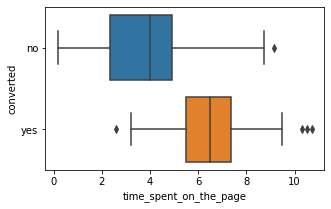

In [18]:
plt.figure(figsize=(5,3))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'converted')
plt.show()

### Observation
People who has converted to a subscriber on the new landing page has spent a more median time. Conveted data has outliers on either side as well

### Language Preffered vs time spent on the page

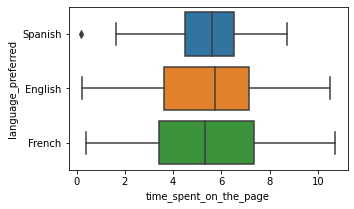

In [19]:
plt.figure(figsize=(5,3))
sns.boxplot(data = df, x = 'time_spent_on_the_page', y = 'language_preferred')
plt.show()

### Observations
English and French speaking people spent more time on the landing page

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

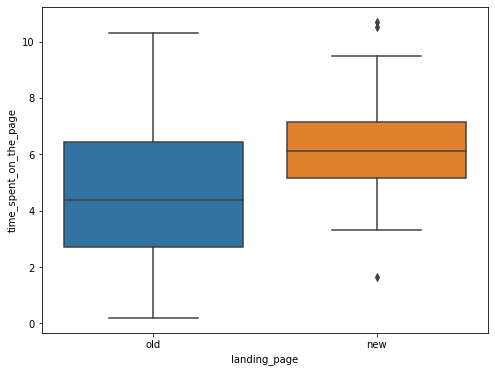

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Observation
From the graph it is clear that median time spend on the new landing page is more. However, it has outliers on either side
Inter quartile rage for old page is more

### Null and alternate hypotheses

$H_0$: The new process of having a new page does not improve the time on the landing page

$H_a$: The new process of having a landing page improves the time spent on the landing page

### Test selection

This is a one-tailed test concerning two population means from two independent populations. The population standard deviations are unknown. Hence, we do a 2 independent sample t test

### Significance level

As given in the problem statement, we select  𝛼=0.05 .

In [21]:
# Data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [22]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### p-value

In [23]:
# importing the required function
from scipy.stats import ttest_ind 

# To calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')  #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Comparing p-value with $\alpha$

p value is less than the 5% significance level

### Inference

As the p-value (~0.001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend more time on the new landing page

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

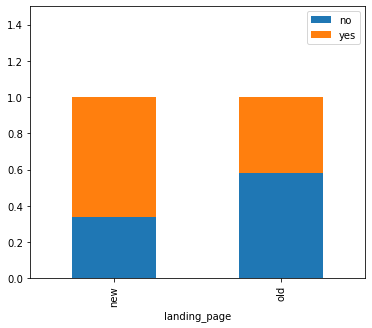

In [24]:
#To compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,5),stacked=True)
plt.legend()
plt.ylim(0,1.5)
plt.show()

### Observation
It is clear from the count plot that users getting converted in the new landing page is more than the old.

#### Null and Alternate Hypothesis

$H_0:$ Conversion rate is equal for both the landing pages
    
$H_a:$ Conversion rate is greater for the new landing page

#### Test selection

This is a one-tailed test concerning two population proportions from two independent populations.

#### Level of significance

As given in the problem statement, we select α = 0.05.

In [25]:
# To calculate converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# To calculate converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [26]:
# code to import the required function
from statsmodels.stats.proportion import proportions_ztest   

# code to calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   #complete the code by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.008026308204056278


In [27]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Inference

Since we have got evidence to reject the null hypothesis it is clear that conversion rate is more on the new landing page

## 3. Is the conversion and preferred language are independent or related?

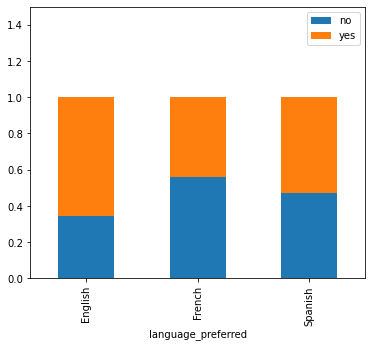

In [28]:
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,5), stacked=True)
plt.ylim(0,1.5)
plt.legend()
plt.show()

### Observation
Conversion rate is more among English preffered people

French preffered people is least converted

#### Null and alternate Hypothesis

$H_0:$ language preffered and conversion are independent

$H_a:$ language preffered and conversion are not independent

#### Test Selection

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. So the test to be done is Chi square test of independence.

#### Level of significance

As given in the problem statement, we select α = 0.05.

In [29]:
# To create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])  

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [30]:
# importing the function
from scipy.stats import chi2_contingency 

In [31]:
# To calculate the p value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   

print('The p-value is', p_value)

The p-value is 0.2129888748754345


In [32]:
# conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Insight
As the p-value is greater than the significance level, we cannot reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that language prefered and conversion are not independent at 5% significance level.

## 4. Is the time spent on the new page same for the different language users?

In [33]:
# A new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

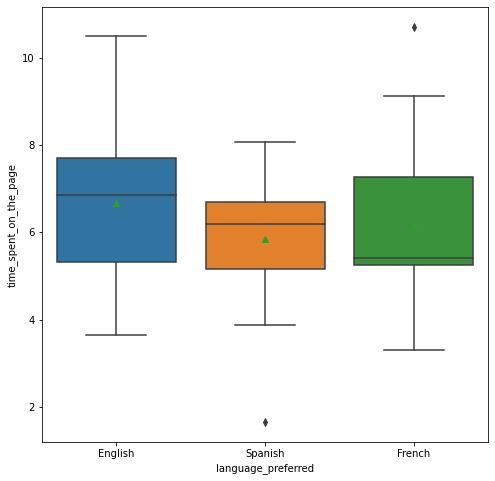

In [34]:
# Time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()

### Observation
English and spanish has more users spending time on the new landing page without any outliers on either side.

For French, the median time is less for the new landing page. However, there are outliers towards more time spend.

In [ ]:
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

### Observation
The mean time spent by a user on new English landing page is more followed by French and Spanish

#### Null and alternate hypothesis

$H_0:$ Time spent on new page is same for all languages

$H_a:$ Time spent is different on new page for different languages

#### Test selection

This is a problem, concerning three population means.Hence we need to perform an ANOVA test

#### Level of Significance

As given in the problem statement, we select α = 0.05.

In [35]:
# Data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# Data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   

In [36]:
from scipy.stats import levene 

# To calculate the p-value
test_stat, p_value = levene(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [37]:
# Conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


### Inference
The mean time spent on all new landing pages are same

## Conclusion and Business Recommendations

### Conclusion

- Number of people who reads English Spanish and French are same
- Mean time spent on the landing page is 5.38 minutes
- Out of the 100 selected people 54  of the users were converted when the landing page was updated.
- Median time spent on the new landing page is more. However, the IQR is more for old landing page
- As time spent on the landing page increases conversion rate also increases.
- Based on the test conducated it is clear that user spent more time on the new landing page
- Conversion rate on the new landing page is more
- It is clear that language preffered and converstion rate are independent
- Time spent on the new page is same for all languages

### Recomendation

- Based on the sample tested, the new landing page has increased the time spent on the landing page. Hence it would be good to go.
- Making changes for the landing page makes the user to stay longer. Therby increasing the conversion rate
- Irrespective of the language, time spent on the landing page is almost the same.So, changes has to made for all languages to increase the conversion rate